# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from sklearn.metrics import mean_absolute_percentage_error # library for evaluation  mape
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
import statsmodels.api as smapi

import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ETH"
cryptoPair = "USDT"

trainTestSplit = 0.8

# Loading dataset

In [3]:
api_key = 'API' 
api_secret = 'SECRET_API'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data = data.iloc[:-1 , :]

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head() # showing the first 5 rows of data

close
2021-01-01 03:59:59.999  744.82000000
2021-01-01 07:59:59.999  737.38000000
2021-01-01 11:59:59.999  738.85000000
2021-01-01 15:59:59.999  735.39000000
2021-01-01 19:59:59.999  725.34000000

### Five last records of data

In [5]:
data.tail() # showing the last 5 rows of data

close
2021-12-31 07:59:59.999  3721.88000000
2021-12-31 11:59:59.999  3780.92000000
2021-12-31 15:59:59.999  3784.64000000
2021-12-31 19:59:59.999  3626.27000000
2021-12-31 23:59:59.999  3676.23000000

### Coloumns/features in data

In [6]:
data.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2190


### Shape of data

In [8]:
data.shape #shape of data

(2190, 1)

### Data information

In [9]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2021-01-01 03:59:59.999000 to 2021-12-31 23:59:59.999000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2190 non-null   object
dtypes: object(1)
memory usage: 34.2+ KB


### Data types of all coloumns

In [10]:
data.dtypes #data types of data

close    object
dtype: object

### Checking missing Values

In [11]:
data[data.isnull().any(axis=1)].head() #checking the null values 

Empty DataFrame
Columns: [close]
Index: []

### Count of missing values

In [12]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [13]:
data.isnull().values.any() #checking the null values 

False

### Counts of missing values in each column

In [14]:
data.isnull().sum() #checking the null values columns wise 

close    0
dtype: int64

### Data Description

In [15]:
data.describe() # statics of data 

close
count            2190
unique           2184
top     1208.42000000
freq                2

In [16]:
data['close']=data['close'].astype(float)

### Spliting date into day, month and year

In [17]:
data['date'] = data.index # taking dates in date column 
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data
data['Hour'] = data['date'].dt.hour # extracting year from data
data['Minutes'] = data['date'].dt.minute # extracting year from data

### Close price with respect to year 

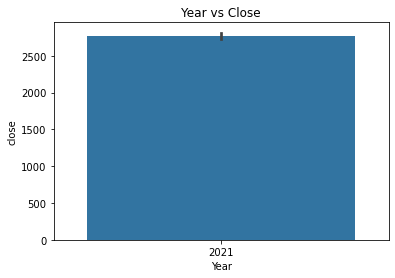

In [18]:
sns.barplot(x='Year', y='close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

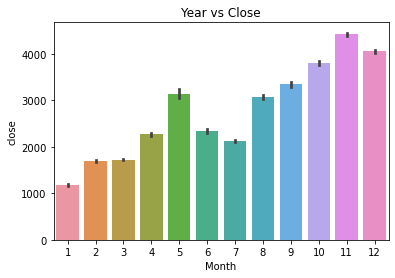

In [19]:
sns.barplot(x='Month', y='close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Hour 

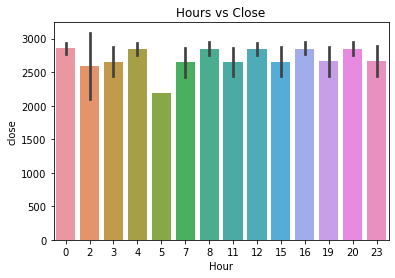

In [20]:
sns.barplot(x='Hour', y='close', data=data).set(title='Hours vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Minutes 

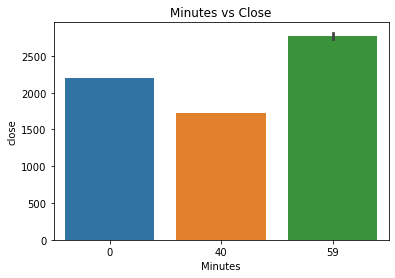

In [21]:
sns.barplot(x='Minutes', y='close', data=data).set(title='Minutes vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

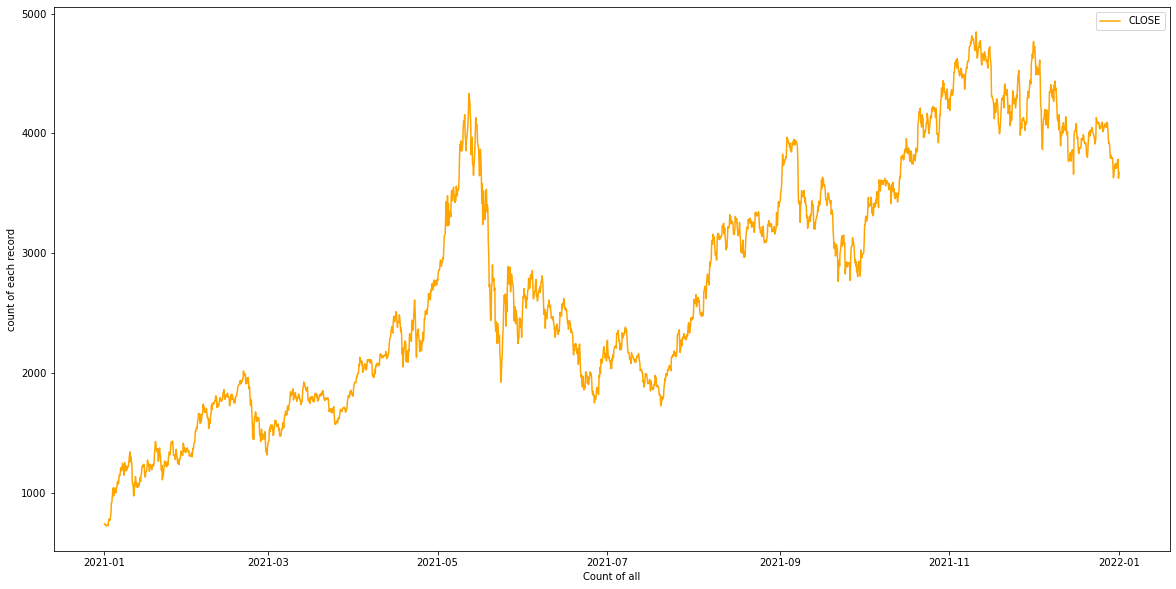

In [22]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

# Extracting the Indicators

# ------------------------------------------------------------------------------------------------------

### EMA and SMA 

### Moving average features

In [23]:
data['EMA_50'] = data['close'].ewm(50).mean().shift() # calculting the ema 50
data['EMA_200'] =data['close'].ewm(200).mean().shift() # calculting the ema 200
data['MA_50'] = data['close'].rolling(50).mean() # calculting the ma 50
data['MA_200'] = data['close'].rolling(200).mean() # calculting the ma 200
fig = go.Figure() #plot setting 
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50')) # plotting the ema 50
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200')) # plotting the ema 200
fig.add_trace(go.Scatter(x=data.index, y=data.close, name='close', line_color='dimgray', opacity=0.3)) # plotting the close
fig.show() #showing the plot 

In [24]:
fig = go.Figure() #plot setting 
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50')) # plotting the ma 50
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200')) # plotting the ma 200
fig.add_trace(go.Scatter(x=data.index, y=data.close, name='close', line_color='dimgray', opacity=0.3)) # plotting the close 
fig.show() # showing plot 

# Final Data after features extraction and preparation

In [25]:
data=data.tail(len(data)-200) # ignoring the first 200 rows as there are Nan/missing values 
data #data 

close                    date  Month  Day  Year  \
2021-02-03 11:59:59.999  1537.68 2021-02-03 11:59:59.999      2    3  2021   
2021-02-03 15:59:59.999  1597.25 2021-02-03 15:59:59.999      2    3  2021   
2021-02-03 19:59:59.999  1616.10 2021-02-03 19:59:59.999      2    3  2021   
2021-02-03 23:59:59.999  1664.49 2021-02-03 23:59:59.999      2    3  2021   
2021-02-04 03:59:59.999  1645.84 2021-02-04 03:59:59.999      2    4  2021   
...                          ...                     ...    ...  ...   ...   
2021-12-31 07:59:59.999  3721.88 2021-12-31 07:59:59.999     12   31  2021   
2021-12-31 11:59:59.999  3780.92 2021-12-31 11:59:59.999     12   31  2021   
2021-12-31 15:59:59.999  3784.64 2021-12-31 15:59:59.999     12   31  2021   
2021-12-31 19:59:59.999  3626.27 2021-12-31 19:59:59.999     12   31  2021   
2021-12-31 23:59:59.999  3676.23 2021-12-31 23:59:59.999     12   31  2021   

                         Hour  Minutes       EMA_50      EMA_200      MA_50  \
2021-02-03 11:59:59.999    11       59  1320.593118  1242.431000  1354.4676   
2021-02-03 15:59:59.999    15       59  1324.930749  1244.751400  1360.0644   
2021-02-03 19:59:59.999    19       59  1330.369951  1247.513765  1366.1172   
2021-02-03 23:59:59.999    23       59  1336.074930  1250.393961  1373.8080   
2021-02-04 03:59:59.999     3       59  1342.629821  1253.620617  1379.8860   
...                       ...      ...          ...          ...        ...   
2021-12-31 07:59:59.999     7       59  3955.552391  4035.849483  3942.6452   
2021-12-31 11:59:59.999    11       59  3950.970579  4034.287417  3939.0518   
2021-12-31 15:59:59.999    15       59  3947.636254  4033.026860  3936.5126   
2021-12-31 19:59:59.999    19       59  3944.440249  4031.791082  3930.3516   
2021-12-31 23:59:59.999    23       59  3938.201617  4029.773527  3924.8632   

                             MA_200  
2021-02-03 11:59:59.999  1208.24450  
2021-02-03 15:59:59.999  1212.54385  
2021-02-03 19:59:59.999  1216.93010  
2021-02-03 23:59:59.999  1221.57560  
2021-02-04 03:59:59.999  1226.17810  
...                             ...  
2021-12-31 07:59:59.999  4085.25265  
2021-12-31 11:59:59.999  4084.02710  
2021-12-31 15:59:59.999  4082.60375  
2021-12-31 19:59:59.999  4080.25210  
2021-12-31 23:59:59.999  4078.24455  

[1990 rows x 11 columns]

# -----------------------------------------------------------------------------------------------------------

In [26]:
def adjustDatasetPredict(model):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 

    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]

        X_train=first90.drop(columns=['close','date']) #dropping the 'Close','date'
        y_train=first90['close'] # output close 
        newDataframe = pd.DataFrame().append([row[1]])
        X_test = newDataframe.drop(columns=['close','date'])

        prediction_test = model.predict(X_test)
        returnVal.append(prediction_test[0])
        row[1]['close'] = prediction_test[0]

        first90 = first90.append([row[1]])

        first90['EMA_50'] = first90['close'].ewm(50).mean().shift() # calculting the ema 50
        first90['EMA_200'] =first90['close'].ewm(200).mean().shift() # calculting the ema 200
        first90['MA_50'] = first90['close'].rolling(50).mean() # calculting the ma 50
        first90['MA_200'] = first90['close'].rolling(200).mean() # calculting the ma 200
    
    return returnVal

def adjustDatasetPredictSARIMAX(best_cfg):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 
     
    second10['EMA_50'] = np.nan
    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]
        
        newDataframe = pd.DataFrame().append([row[1]])
        newDataframe['close'].loc[:] = np.nan
        df6 = pd.concat([first90,newDataframe])

        model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200']],order=(best_cfg),seasonal_order=(1,1,1,12))
        results=model.fit()
        
        preds = results.predict(start=len(df6), end=len(df6), exog=newDataframe[['EMA_50', 'EMA_200','MA_50','MA_200']], dynamic = True)
        predSeries = pd.Series(preds.tolist())
        
        returnVal.append(predSeries[0])
        row[1]['close'] = predSeries[0]
        new90 = first90.append([row[1]])

        new90['EMA_50'] = new90['close'].ewm(50).mean().shift() # calculting the ema 50
        new90['EMA_200'] =new90['close'].ewm(200).mean().shift() # calculting the ema 200
        new90['MA_50'] = new90['close'].rolling(50).mean() # calculting the ma 50
        new90['MA_200'] = new90['close'].rolling(200).mean() # calculting the ma 200
        first90 = first90.append(new90.iloc[-1])
        print(first90.iloc[-1])
    return returnVal

def adjustDatasetPredictARIMAX(best_cfg):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 
     
    second10['EMA_50'] = np.nan
    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]
        
        newDataframe = pd.DataFrame().append([row[1]])
        newDataframe['close'].loc[:] = np.nan
        df6 = pd.concat([first90,newDataframe])

        model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200']],order=(best_cfg))
        results=model.fit()
        
        preds = results.predict(start=len(df6), end=len(df6), exog=newDataframe[['EMA_50', 'EMA_200','MA_50','MA_200']], dynamic = True)
        predSeries = pd.Series(preds.tolist())
        
        returnVal.append(predSeries[0])
        row[1]['close'] = predSeries[0]
        new90 = first90.append([row[1]])

        new90['EMA_50'] = new90['close'].ewm(50).mean().shift() # calculting the ema 50
        new90['EMA_200'] =new90['close'].ewm(200).mean().shift() # calculting the ema 200
        new90['MA_50'] = new90['close'].rolling(50).mean() # calculting the ma 50
        new90['MA_200'] = new90['close'].rolling(200).mean() # calculting the ma 200
        first90 = first90.append(new90.iloc[-1])
        print(first90.iloc[-1])
    return returnVal

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [27]:
X=data.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

Month  Day  Year  Hour  Minutes       EMA_50  \
2021-02-03 11:59:59.999      2    3  2021    11       59  1320.593118   
2021-02-03 15:59:59.999      2    3  2021    15       59  1324.930749   
2021-02-03 19:59:59.999      2    3  2021    19       59  1330.369951   
2021-02-03 23:59:59.999      2    3  2021    23       59  1336.074930   
2021-02-04 03:59:59.999      2    4  2021     3       59  1342.629821   
...                        ...  ...   ...   ...      ...          ...   
2021-12-31 07:59:59.999     12   31  2021     7       59  3955.552391   
2021-12-31 11:59:59.999     12   31  2021    11       59  3950.970579   
2021-12-31 15:59:59.999     12   31  2021    15       59  3947.636254   
2021-12-31 19:59:59.999     12   31  2021    19       59  3944.440249   
2021-12-31 23:59:59.999     12   31  2021    23       59  3938.201617   

                             EMA_200      MA_50      MA_200  
2021-02-03 11:59:59.999  1242.431000  1354.4676  1208.24450  
2021-02-03 15:59:59.999  1244.751400  1360.0644  1212.54385  
2021-02-03 19:59:59.999  1247.513765  1366.1172  1216.93010  
2021-02-03 23:59:59.999  1250.393961  1373.8080  1221.57560  
2021-02-04 03:59:59.999  1253.620617  1379.8860  1226.17810  
...                              ...        ...         ...  
2021-12-31 07:59:59.999  4035.849483  3942.6452  4085.25265  
2021-12-31 11:59:59.999  4034.287417  3939.0518  4084.02710  
2021-12-31 15:59:59.999  4033.026860  3936.5126  4082.60375  
2021-12-31 19:59:59.999  4031.791082  3930.3516  4080.25210  
2021-12-31 23:59:59.999  4029.773527  3924.8632  4078.24455  

[1990 rows x 9 columns]

### Taking target as output

In [28]:
y=data['close'] # output close 
y #output 

2021-02-03 11:59:59.999    1537.68
2021-02-03 15:59:59.999    1597.25
2021-02-03 19:59:59.999    1616.10
2021-02-03 23:59:59.999    1664.49
2021-02-04 03:59:59.999    1645.84
                            ...   
2021-12-31 07:59:59.999    3721.88
2021-12-31 11:59:59.999    3780.92
2021-12-31 15:59:59.999    3784.64
2021-12-31 19:59:59.999    3626.27
2021-12-31 23:59:59.999    3676.23
Name: close, Length: 1990, dtype: float64

### Spliting the data into training and Testing

In [29]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# ARIMAX Model

### Parametrs

In [30]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200']],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=195.081
ARIMA(0, 0, 1) RMSE=195.963
ARIMA(0, 0, 2) RMSE=250.803
ARIMA(0, 1, 0) RMSE=378.189
ARIMA(0, 1, 1) RMSE=709.673
ARIMA(0, 1, 2) RMSE=1977.468
ARIMA(0, 2, 0) RMSE=4776.779
ARIMA(0, 2, 1) RMSE=6037.399
ARIMA(0, 2, 2) RMSE=6045.115
ARIMA(1, 0, 0) RMSE=883.562
ARIMA(1, 0, 1) RMSE=1312.655
ARIMA(1, 0, 2) RMSE=2878.435
ARIMA(1, 1, 0) RMSE=10487.394
ARIMA(1, 1, 1) RMSE=18716.237
ARIMA(1, 1, 2) RMSE=22606.422
ARIMA(1, 2, 0) RMSE=6170.481
ARIMA(1, 2, 1) RMSE=6163.606
ARIMA(1, 2, 2) RMSE=4281.640
ARIMA(2, 0, 0) RMSE=6903.229
ARIMA(2, 0, 1) RMSE=380.405
ARIMA(2, 0, 2) RMSE=21653.881
ARIMA(2, 1, 0) RMSE=21470.582
ARIMA(2, 1, 1) RMSE=11761.906
ARIMA(2, 1, 2) RMSE=24425.115
ARIMA(2, 2, 0) RMSE=6077.448
ARIMA(2, 2, 1) RMSE=6075.062
ARIMA(2, 2, 2) RMSE=6002.841
ARIMA(4, 0, 0) RMSE=14931.429
ARIMA(4, 0, 1) RMSE=37501.557
ARIMA(4, 0, 2) RMSE=21565.591
ARIMA(4, 1, 0) RMSE=17723.659
ARIMA(4, 1, 1) RMSE=14860.623
ARIMA(4, 1, 2) RMSE=15980.853
ARIMA(4, 2, 0) RMSE=6226.026
ARIMA(4,

In [31]:
%%time
y_pred_test = adjustDatasetPredictARIMAX(best_cfg)

close                     4124.946584
date       2021-10-26 20:59:59.999000
Month                              10
Day                                26
Year                             2021
Hour                               20
Minutes                            59
EMA_50                    3882.928331
EMA_200                   3444.958128
MA_50                     4039.135332
MA_200                    3543.818633
Name: 2021-10-26 20:59:59.999000, dtype: object
close                     4132.810736
date       2021-10-27 00:59:59.999000
Month                              10
Day                                27
Year                             2021
Hour                                0
Minutes                            59
EMA_50                    3887.673787
EMA_200                   3448.342354
MA_50                     4046.571546
MA_200                    3549.020837
Name: 2021-10-27 00:59:59.999000, dtype: object
close                     4140.721014
date       2021-10-27 04:59:59

close                     4223.655065
date       2021-10-29 20:59:59.999000
Month                              10
Day                                29
Year                             2021
Hour                               20
Minutes                            59
EMA_50                    3975.057416
EMA_200                    3508.75073
MA_50                      4135.96745
MA_200                    3655.236012
Name: 2021-10-29 20:59:59.999000, dtype: object
close                     4221.948679
date       2021-10-30 00:59:59.999000
Month                              10
Day                                30
Year                             2021
Hour                                0
Minutes                            59
EMA_50                     3979.93188
EMA_200                    3512.30862
MA_50                     4138.606423
MA_200                    3661.079906
Name: 2021-10-30 00:59:59.999000, dtype: object
close                     4223.483499
date       2021-10-30 04:59:59

close                     4265.233491
date       2021-11-01 19:59:59.999000
Month                              11
Day                                 1
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4055.044411
EMA_200                   3571.618939
MA_50                     4198.601738
MA_200                    3769.675185
Name: 2021-11-01 19:59:59.999000, dtype: object
close                     4269.597093
date       2021-11-01 23:59:59.999000
Month                              11
Day                                 1
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4059.165765
EMA_200                   3575.070779
MA_50                      4203.99148
MA_200                     3776.71722
Name: 2021-11-01 23:59:59.999000, dtype: object
close                      4274.68295
date       2021-11-02 03:59:59

close                     4302.697831
date       2021-11-04 19:59:59.999000
Month                              11
Day                                 4
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4124.546036
EMA_200                   3632.993003
MA_50                     4248.672998
MA_200                      3878.0536
Name: 2021-11-04 19:59:59.999000, dtype: object
close                     4305.747554
date       2021-11-04 23:59:59.999000
Month                              11
Day                                 4
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4128.039209
EMA_200                    3636.32577
MA_50                     4251.455789
MA_200                    3882.649638
Name: 2021-11-04 23:59:59.999000, dtype: object
close                      4307.47454
date       2021-11-05 03:59:59

close                     4333.691989
date       2021-11-07 19:59:59.999000
Month                              11
Day                                 7
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4183.038632
EMA_200                   3691.909299
MA_50                     4288.462988
MA_200                    3961.311921
Name: 2021-11-07 19:59:59.999000, dtype: object
close                     4335.342027
date       2021-11-07 23:59:59.999000
Month                              11
Day                                 7
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4185.992619
EMA_200                   3695.103038
MA_50                     4290.608068
MA_200                    3965.896881
Name: 2021-11-07 23:59:59.999000, dtype: object
close                     4337.033139
date       2021-11-08 03:59:59

close                      4361.64076
date       2021-11-10 19:59:59.999000
Month                              11
Day                                10
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4232.670821
EMA_200                   3748.250606
MA_50                     4322.719503
MA_200                    4033.761587
Name: 2021-11-10 19:59:59.999000, dtype: object
close                      4363.71813
date       2021-11-10 23:59:59.999000
Month                              11
Day                                10
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4235.199643
EMA_200                   3751.302989
MA_50                     4324.314691
MA_200                    4037.475378
Name: 2021-11-10 23:59:59.999000, dtype: object
close                     4364.090611
date       2021-11-11 03:59:59

close                      4383.04985
date       2021-11-13 19:59:59.999000
Month                              11
Day                                13
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4274.699615
EMA_200                   3801.850733
MA_50                     4350.834481
MA_200                    4106.464529
Name: 2021-11-13 19:59:59.999000, dtype: object
close                     4384.085225
date       2021-11-13 23:59:59.999000
Month                              11
Day                                13
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4276.824129
EMA_200                   3804.742869
MA_50                     4352.237849
MA_200                    4110.417105
Name: 2021-11-13 23:59:59.999000, dtype: object
close                     4385.109428
date       2021-11-14 03:59:59

close                     4398.629406
date       2021-11-16 19:59:59.999000
Month                              11
Day                                16
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4309.621491
EMA_200                   3852.432257
MA_50                     4374.090055
MA_200                      4183.9125
Name: 2021-11-16 19:59:59.999000, dtype: object
close                     4399.536887
date       2021-11-16 23:59:59.999000
Month                              11
Day                                16
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4311.366745
EMA_200                    3855.15017
MA_50                     4375.232784
MA_200                    4186.868084
Name: 2021-11-16 23:59:59.999000, dtype: object
close                     4400.535853
date       2021-11-17 03:59:59

close                     4415.595294
date       2021-11-19 19:59:59.999000
Month                              11
Day                                19
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4338.814198
EMA_200                   3900.024973
MA_50                     4392.878167
MA_200                    4234.836589
Name: 2021-11-19 19:59:59.999000, dtype: object
close                     4415.779139
date       2021-11-19 23:59:59.999000
Month                              11
Day                                19
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4340.319709
EMA_200                   3902.590443
MA_50                     4393.822949
MA_200                    4237.974435
Name: 2021-11-19 23:59:59.999000, dtype: object
close                     4416.525308
date       2021-11-20 03:59:59

close                      4427.22041
date       2021-11-22 19:59:59.999000
Month                              11
Day                                22
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4363.561671
EMA_200                    3944.77242
MA_50                     4408.592539
MA_200                    4290.017052
Name: 2021-11-22 19:59:59.999000, dtype: object
close                     4427.884816
date       2021-11-22 23:59:59.999000
Month                              11
Day                                22
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4364.809882
EMA_200                   3947.173038
MA_50                     4409.392422
MA_200                    4291.751526
Name: 2021-11-22 23:59:59.999000, dtype: object
close                     4428.735052
date       2021-11-23 03:59:59

close                     4442.967663
date       2021-11-25 19:59:59.999000
Month                              11
Day                                25
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4385.048876
EMA_200                   3986.859337
MA_50                     4423.211794
MA_200                    4321.479997
Name: 2021-11-25 19:59:59.999000, dtype: object
close                     4443.179262
date       2021-11-25 23:59:59.999000
Month                              11
Day                                25
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4386.184539
EMA_200                   3989.128861
MA_50                     4424.007633
MA_200                    4323.262894
Name: 2021-11-25 23:59:59.999000, dtype: object
close                     4444.656689
date       2021-11-26 03:59:59

close                     4459.170387
date       2021-11-28 19:59:59.999000
Month                              11
Day                                28
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4404.783665
EMA_200                   4026.675314
MA_50                      4437.72513
MA_200                    4350.198853
Name: 2021-11-28 19:59:59.999000, dtype: object
close                     4460.162667
date       2021-11-28 23:59:59.999000
Month                              11
Day                                28
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4405.850072
EMA_200                   4028.827314
MA_50                      4438.55293
MA_200                    4351.561466
Name: 2021-11-28 23:59:59.999000, dtype: object
close                     4460.676473
date       2021-11-29 03:59:59

close                     4477.647537
date       2021-12-01 19:59:59.999000
Month                              12
Day                                 1
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4423.758143
EMA_200                   4064.544355
MA_50                     4453.635355
MA_200                    4375.738755
Name: 2021-12-01 19:59:59.999000, dtype: object
close                     4478.779227
date       2021-12-01 23:59:59.999000
Month                              12
Day                                 1
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4424.814798
EMA_200                   4066.599843
MA_50                     4454.580026
MA_200                     4377.01098
Name: 2021-12-01 23:59:59.999000, dtype: object
close                     4479.930127
date       2021-12-02 03:59:59

close                     4498.851772
date       2021-12-04 19:59:59.999000
Month                              12
Day                                 4
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4443.045304
EMA_200                   4100.875079
MA_50                     4471.453677
MA_200                    4398.276867
Name: 2021-12-04 19:59:59.999000, dtype: object
close                     4500.041684
date       2021-12-04 23:59:59.999000
Month                              12
Day                                 4
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4444.139548
EMA_200                   4102.855281
MA_50                     4472.506579
MA_200                    4399.463546
Name: 2021-12-04 23:59:59.999000, dtype: object
close                     4501.311323
date       2021-12-05 03:59:59

close                      4522.31918
date       2021-12-07 19:59:59.999000
Month                              12
Day                                 7
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4463.264981
EMA_200                    4136.00391
MA_50                       4491.6587
MA_200                    4418.722178
Name: 2021-12-07 19:59:59.999000, dtype: object
close                     4524.256238
date       2021-12-07 23:59:59.999000
Month                              12
Day                                 7
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4464.422906
EMA_200                    4137.92607
MA_50                     4492.864628
MA_200                    4419.842757
Name: 2021-12-07 23:59:59.999000, dtype: object
close                     4525.694534
date       2021-12-08 03:59:59

close                     4550.129852
date       2021-12-10 19:59:59.999000
Month                              12
Day                                10
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4485.108421
EMA_200                   4170.311023
MA_50                     4514.731637
MA_200                    4438.510678
Name: 2021-12-10 19:59:59.999000, dtype: object
close                     4551.106747
date       2021-12-10 23:59:59.999000
Month                              12
Day                                10
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4486.383351
EMA_200                   4172.200843
MA_50                     4516.087107
MA_200                    4439.605961
Name: 2021-12-10 23:59:59.999000, dtype: object
close                     4553.195903
date       2021-12-11 03:59:59

close                     4580.283418
date       2021-12-13 19:59:59.999000
Month                              12
Day                                13
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4509.005466
EMA_200                   4204.129885
MA_50                     4540.729316
MA_200                    4458.261385
Name: 2021-12-13 19:59:59.999000, dtype: object
close                      4581.97178
date       2021-12-13 23:59:59.999000
Month                              12
Day                                13
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4510.403073
EMA_200                   4206.001453
MA_50                     4542.265962
MA_200                    4459.369476
Name: 2021-12-13 23:59:59.999000, dtype: object
close                     4583.794814
date       2021-12-14 03:59:59

close                     4613.634623
date       2021-12-16 19:59:59.999000
Month                              12
Day                                16
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4535.284301
EMA_200                   4237.772967
MA_50                     4569.881325
MA_200                    4478.648304
Name: 2021-12-16 19:59:59.999000, dtype: object
close                     4615.579838
date       2021-12-16 23:59:59.999000
Month                              12
Day                                16
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4536.820581
EMA_200                   4239.643069
MA_50                     4571.591239
MA_200                    4479.816236
Name: 2021-12-16 23:59:59.999000, dtype: object
close                     4617.543848
date       2021-12-17 03:59:59

close                     4649.606474
date       2021-12-19 19:59:59.999000
Month                              12
Day                                19
Year                             2021
Hour                               19
Minutes                            59
EMA_50                     4564.16012
EMA_200                   4271.520892
MA_50                     4602.114883
MA_200                    4500.489152
Name: 2021-12-19 19:59:59.999000, dtype: object
close                     4652.059534
date       2021-12-19 23:59:59.999000
Month                              12
Day                                19
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4565.835539
EMA_200                   4273.402047
MA_50                     4603.994104
MA_200                    4501.760506
Name: 2021-12-19 23:59:59.999000, dtype: object
close                     4654.164459
date       2021-12-20 03:59:59

close                       4689.0084
date       2021-12-22 19:59:59.999000
Month                              12
Day                                22
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4595.666064
EMA_200                   4305.598384
MA_50                     4637.336379
MA_200                    4524.310513
Name: 2021-12-22 19:59:59.999000, dtype: object
close                     4691.249817
date       2021-12-22 23:59:59.999000
Month                              12
Day                                22
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4597.496306
EMA_200                   4307.506019
MA_50                     4639.377363
MA_200                    4525.696439
Name: 2021-12-22 23:59:59.999000, dtype: object
close                        4693.505
date       2021-12-23 03:59:59

close                     4730.533559
date       2021-12-25 19:59:59.999000
Month                              12
Day                                25
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4629.816607
EMA_200                   4340.208108
MA_50                     4675.354978
MA_200                    4550.441823
Name: 2021-12-25 19:59:59.999000, dtype: object
close                     4732.903887
date       2021-12-25 23:59:59.999000
Month                              12
Day                                25
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4631.791449
EMA_200                    4342.15014
MA_50                     4677.549546
MA_200                    4551.973517
Name: 2021-12-25 23:59:59.999000, dtype: object
close                     4735.277632
date       2021-12-26 03:59:59

close                     4774.213716
date       2021-12-28 19:59:59.999000
Month                              12
Day                                28
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4666.539514
EMA_200                   4375.510404
MA_50                     4715.950013
MA_200                     4579.20221
Name: 2021-12-28 19:59:59.999000, dtype: object
close                     4776.610737
date       2021-12-28 23:59:59.999000
Month                              12
Day                                28
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4668.650773
EMA_200                   4377.494109
MA_50                     4718.271569
MA_200                    4580.874429
Name: 2021-12-28 23:59:59.999000, dtype: object
close                     4779.120319
date       2021-12-29 03:59:59

close                     4819.727303
date       2021-12-31 19:59:59.999000
Month                              12
Day                                31
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4705.619177
EMA_200                   4411.605836
MA_50                      4758.80447
MA_200                    4610.574258
Name: 2021-12-31 19:59:59.999000, dtype: object
close                     4822.333561
date       2021-12-31 23:59:59.999000
Month                              12
Day                                31
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4707.856592
EMA_200                   4413.636391
MA_50                     4761.245023
MA_200                    4612.393458
Name: 2021-12-31 23:59:59.999000, dtype: object
Wall time: 7min 27s


# Evaluation Measures on Test data

# MSE

In [32]:
test_mse1=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  228885.93222


# MAE

In [33]:
test_MAE1=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  386.9783


# RMSE

In [34]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  478.42025


# MAPE

In [35]:
test_mape1=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.09514


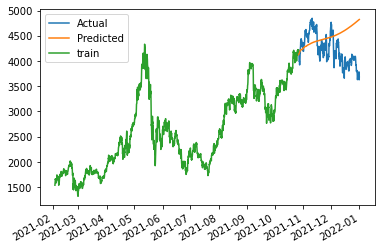

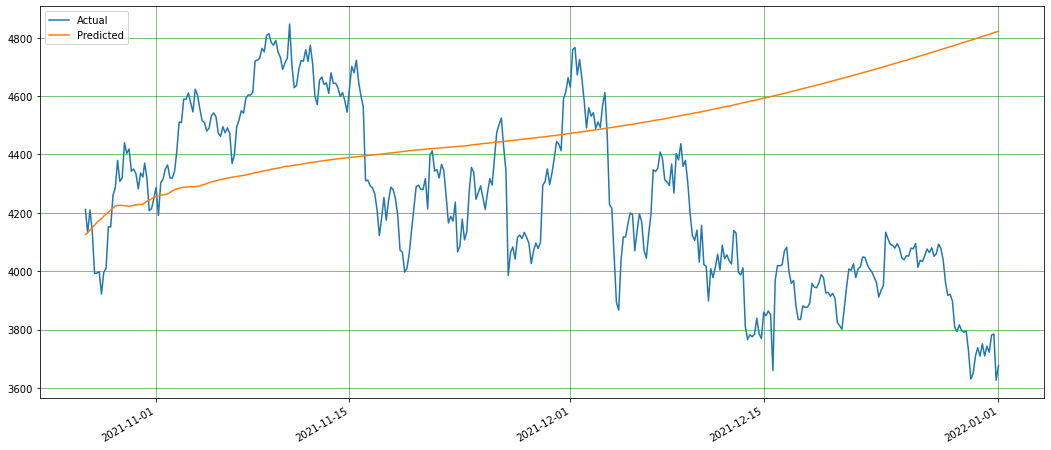

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

### Parametrs

In [37]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200']],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=182.385
ARIMA(0, 0, 1) RMSE=183.828
ARIMA(0, 0, 2) RMSE=186.144
ARIMA(0, 1, 0) RMSE=507.135
ARIMA(0, 1, 1) RMSE=815.520
ARIMA(0, 1, 2) RMSE=1659.441
ARIMA(0, 2, 0) RMSE=6355.783
ARIMA(0, 2, 1) RMSE=5563.798
ARIMA(0, 2, 2) RMSE=5559.696
ARIMA(1, 0, 0) RMSE=709.045
ARIMA(1, 0, 1) RMSE=1922.442
ARIMA(1, 0, 2) RMSE=5545.914
ARIMA(1, 1, 0) RMSE=8587.160
ARIMA(1, 1, 1) RMSE=7547.074
ARIMA(1, 1, 2) RMSE=11717.143
ARIMA(1, 2, 0) RMSE=5922.664
ARIMA(1, 2, 1) RMSE=5634.332
ARIMA(1, 2, 2) RMSE=4652.797
ARIMA(2, 0, 0) RMSE=13688.710
ARIMA(2, 0, 1) RMSE=918.327
ARIMA(2, 0, 2) RMSE=1980.343
ARIMA(2, 1, 0) RMSE=7475.956
ARIMA(2, 1, 1) RMSE=9334.007
ARIMA(2, 1, 2) RMSE=9743.516
ARIMA(2, 2, 0) RMSE=5582.262
ARIMA(2, 2, 1) RMSE=6926.995
ARIMA(2, 2, 2) RMSE=3904.876
ARIMA(4, 0, 0) RMSE=10515.073
ARIMA(4, 0, 1) RMSE=13856.627
ARIMA(4, 0, 2) RMSE=5875.992
ARIMA(4, 1, 0) RMSE=4751.144
ARIMA(4, 1, 1) RMSE=1628.657
ARIMA(4, 1, 2) RMSE=4150.670
ARIMA(4, 2, 0) RMSE=5808.671
ARIMA(4, 2, 1) RM

In [38]:
%%time
y_pred_test = adjustDatasetPredictSARIMAX(best_cfg)

close                     4112.686376
date       2021-10-26 20:59:59.999000
Month                              10
Day                                26
Year                             2021
Hour                               20
Minutes                            59
EMA_50                    3882.928331
EMA_200                   3444.958128
MA_50                     4038.890128
MA_200                    3543.757332
Name: 2021-10-26 20:59:59.999000, dtype: object
close                       4154.0606
date       2021-10-27 00:59:59.999000
Month                              10
Day                                27
Year                             2021
Hour                                0
Minutes                            59
EMA_50                    3887.433391
EMA_200                   3448.281336
MA_50                      4046.75134
MA_200                    3549.065785
Name: 2021-10-27 00:59:59.999000, dtype: object
close                     4168.166622
date       2021-10-27 04:59:59

close                     4224.413902
date       2021-10-29 20:59:59.999000
Month                              10
Day                                29
Year                             2021
Hour                               20
Minutes                            59
EMA_50                    3975.732734
EMA_200                   3509.062931
MA_50                     4137.457146
MA_200                    3655.608437
Name: 2021-10-29 20:59:59.999000, dtype: object
close                     4206.456915
date       2021-10-30 00:59:59.999000
Month                              10
Day                                30
Year                             2021
Hour                                0
Minutes                            59
EMA_50                    3980.608835
EMA_200                   3512.623044
MA_50                     4139.786284
MA_200                    3661.374871
Name: 2021-10-30 00:59:59.999000, dtype: object
close                     4214.156999
date       2021-10-30 04:59:59

close                     4185.531689
date       2021-11-01 19:59:59.999000
Month                              11
Day                                 1
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4042.933044
EMA_200                   3568.408353
MA_50                     4183.981764
MA_200                    3766.020191
Name: 2021-11-01 19:59:59.999000, dtype: object
close                     4212.565681
date       2021-11-01 23:59:59.999000
Month                              11
Day                                 1
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4045.729096
EMA_200                   3571.479528
MA_50                     4188.230878
MA_200                    3772.777069
Name: 2021-11-01 23:59:59.999000, dtype: object
close                     4206.237147
date       2021-11-02 03:59:59

close                     4193.710116
date       2021-11-04 19:59:59.999000
Month                              11
Day                                 4
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4089.960308
EMA_200                   3622.648417
MA_50                     4200.550055
MA_200                    3866.512203
Name: 2021-11-04 19:59:59.999000, dtype: object
close                     4175.139791
date       2021-11-04 23:59:59.999000
Month                              11
Day                                 4
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4091.994618
EMA_200                   3625.490289
MA_50                     4200.093266
MA_200                    3870.455202
Name: 2021-11-04 23:59:59.999000, dtype: object
close                     4183.629765
date       2021-11-05 03:59:59

close                     4184.378998
date       2021-11-07 19:59:59.999000
Month                              11
Day                                 7
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4118.564296
EMA_200                   3670.994134
MA_50                     4194.454242
MA_200                     3937.58624
Name: 2021-11-07 19:59:59.999000, dtype: object
close                     4185.891093
date       2021-11-07 23:59:59.999000
Month                              11
Day                                 7
Year                             2021
Hour                               23
Minutes                            59
EMA_50                     4119.85478
EMA_200                   3673.548919
MA_50                      4194.52942
MA_200                    3941.423945
Name: 2021-11-07 23:59:59.999000, dtype: object
close                     4183.880411
date       2021-11-08 03:59:59

close                     4163.489555
date       2021-11-10 19:59:59.999000
Month                              11
Day                                10
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4135.086418
EMA_200                   3714.198655
MA_50                     4184.026335
MA_200                    3994.174216
Name: 2021-11-10 19:59:59.999000, dtype: object
close                     4157.272076
date       2021-11-10 23:59:59.999000
Month                              11
Day                                10
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4135.643342
EMA_200                   3716.434439
MA_50                     4183.036768
MA_200                    3996.855777
Name: 2021-11-10 23:59:59.999000, dtype: object
close                     4161.798472
date       2021-11-11 03:59:59

close                     4143.555031
date       2021-11-13 19:59:59.999000
Month                              11
Day                                13
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4140.693611
EMA_200                   3751.992257
MA_50                     4169.656648
MA_200                    4047.070025
Name: 2021-11-13 19:59:59.999000, dtype: object
close                     4143.079275
date       2021-11-13 23:59:59.999000
Month                              11
Day                                13
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4140.749718
EMA_200                   3753.940733
MA_50                     4168.639763
MA_200                    4049.817572
Name: 2021-11-13 23:59:59.999000, dtype: object
close                     4140.413772
date       2021-11-14 03:59:59

close                     4109.164101
date       2021-11-16 19:59:59.999000
Month                              11
Day                                16
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4136.582843
EMA_200                    3784.25912
MA_50                     4148.163549
MA_200                    4100.620161
Name: 2021-11-16 19:59:59.999000, dtype: object
close                     4104.866679
date       2021-11-16 23:59:59.999000
Month                              11
Day                                16
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4136.045221
EMA_200                   3785.875869
MA_50                     4146.849102
MA_200                    4102.102395
Name: 2021-11-16 23:59:59.999000, dtype: object
close                     4103.872737
date       2021-11-17 03:59:59

close                     4079.199045
date       2021-11-19 19:59:59.999000
Month                              11
Day                                19
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4123.684991
EMA_200                   3810.880841
MA_50                     4121.235844
MA_200                    4123.228361
Name: 2021-11-19 19:59:59.999000, dtype: object
close                      4078.73328
date       2021-11-19 23:59:59.999000
Month                              11
Day                                19
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4122.812717
EMA_200                   3812.215988
MA_50                     4119.592793
MA_200                    4124.680978
Name: 2021-11-19 23:59:59.999000, dtype: object
close                      4077.90684
date       2021-11-20 03:59:59

close                     4040.700062
date       2021-11-22 19:59:59.999000
Month                              11
Day                                22
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4104.848267
EMA_200                    3832.42006
MA_50                     4089.093825
MA_200                    4145.846285
Name: 2021-11-22 19:59:59.999000, dtype: object
close                     4035.574739
date       2021-11-22 23:59:59.999000
Month                              11
Day                                22
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4103.590459
EMA_200                   3833.456443
MA_50                     4087.132152
MA_200                    4145.619208
Name: 2021-11-22 23:59:59.999000, dtype: object
close                     4034.153352
date       2021-11-23 03:59:59

close                     4008.691058
date       2021-11-25 19:59:59.999000
Month                              11
Day                                25
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4080.639246
EMA_200                   3848.942904
MA_50                     4055.109841
MA_200                    4140.199675
Name: 2021-11-25 19:59:59.999000, dtype: object
close                     4007.957552
date       2021-11-25 23:59:59.999000
Month                              11
Day                                25
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4079.228498
EMA_200                   3849.737786
MA_50                      4053.25499
MA_200                    4139.806462
Name: 2021-11-25 23:59:59.999000, dtype: object
close                     4007.852336
date       2021-11-26 03:59:59

close                      3974.48798
date       2021-11-28 19:59:59.999000
Month                              11
Day                                28
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4053.967835
EMA_200                    3861.26448
MA_50                     4020.474832
MA_200                    4127.472452
Name: 2021-11-28 19:59:59.999000, dtype: object
close                     3969.964929
date       2021-11-28 23:59:59.999000
Month                              11
Day                                28
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4052.409406
EMA_200                   3861.827855
MA_50                     4018.475337
MA_200                    4126.384077
Name: 2021-11-28 23:59:59.999000, dtype: object
close                     3968.507583
date       2021-11-29 03:59:59

close                     3944.171339
date       2021-12-01 19:59:59.999000
Month                              12
Day                                 1
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    4025.315932
EMA_200                   3869.665659
MA_50                      3987.15228
MA_200                    4106.669912
Name: 2021-12-01 19:59:59.999000, dtype: object
close                     3943.705247
date       2021-12-01 23:59:59.999000
Month                              12
Day                                 1
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    4023.724861
EMA_200                   3870.036379
MA_50                     3985.399861
MA_200                    4105.259073
Name: 2021-12-01 23:59:59.999000, dtype: object
close                     3943.870036
date       2021-12-02 03:59:59

close                     3914.081771
date       2021-12-04 19:59:59.999000
Month                              12
Day                                 4
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3996.608845
EMA_200                    3874.86553
MA_50                     3955.303559
MA_200                    4082.086398
Name: 2021-12-04 19:59:59.999000, dtype: object
close                     3909.714465
date       2021-12-04 23:59:59.999000
Month                              12
Day                                 4
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3994.990667
EMA_200                   3875.060658
MA_50                     3953.506074
MA_200                    4080.671909
Name: 2021-12-04 23:59:59.999000, dtype: object
close                     3908.362433
date       2021-12-05 03:59:59

close                     3886.646822
date       2021-12-07 19:59:59.999000
Month                              12
Day                                 7
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3967.480506
EMA_200                   3877.031093
MA_50                     3925.247736
MA_200                     4055.01656
Name: 2021-12-07 19:59:59.999000, dtype: object
close                     3886.516046
date       2021-12-07 23:59:59.999000
Month                              12
Day                                 7
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3965.895532
EMA_200                   3877.078937
MA_50                      3923.67229
MA_200                    4053.445664
Name: 2021-12-07 23:59:59.999000, dtype: object
close                      3886.92496
date       2021-12-08 03:59:59

close                     3859.734212
date       2021-12-10 19:59:59.999000
Month                              12
Day                                10
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3939.341149
EMA_200                    3876.78842
MA_50                     3896.778669
MA_200                     4026.76968
Name: 2021-12-10 19:59:59.999000, dtype: object
close                     3854.678043
date       2021-12-10 23:59:59.999000
Month                              12
Day                                10
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3937.780229
EMA_200                   3876.703566
MA_50                     3895.140998
MA_200                    4025.141815
Name: 2021-12-10 23:59:59.999000, dtype: object
close                     3854.004857
date       2021-12-11 03:59:59

close                      3836.11087
date       2021-12-13 19:59:59.999000
Month                              12
Day                                13
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3911.584389
EMA_200                   3874.257299
MA_50                     3869.816157
MA_200                    3997.176051
Name: 2021-12-13 19:59:59.999000, dtype: object
close                     3835.966791
date       2021-12-13 23:59:59.999000
Month                              12
Day                                13
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3910.104517
EMA_200                     3874.0675
MA_50                     3868.425141
MA_200                    3995.527768
Name: 2021-12-13 23:59:59.999000, dtype: object
close                      3836.23093
date       2021-12-14 03:59:59

close                      3812.10419
date       2021-12-16 19:59:59.999000
Month                              12
Day                                16
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3885.353896
EMA_200                   3869.993437
MA_50                      3844.48332
MA_200                    3967.275868
Name: 2021-12-16 19:59:59.999000, dtype: object
close                     3807.879647
date       2021-12-16 23:59:59.999000
Month                              12
Day                                16
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3883.917627
EMA_200                   3869.705409
MA_50                      3843.04522
MA_200                    3965.598748
Name: 2021-12-16 23:59:59.999000, dtype: object
close                     3807.096959
date       2021-12-17 03:59:59

close                     3792.244035
date       2021-12-19 19:59:59.999000
Month                              12
Day                                19
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3860.089492
EMA_200                   3864.117164
MA_50                     3821.006779
MA_200                     3937.66402
Name: 2021-12-19 19:59:59.999000, dtype: object
close                     3792.394451
date       2021-12-19 23:59:59.999000
Month                              12
Day                                19
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3858.759189
EMA_200                   3863.759561
MA_50                      3819.80993
MA_200                    3936.060293
Name: 2021-12-19 23:59:59.999000, dtype: object
close                     3791.251314
date       2021-12-20 03:59:59

close                     3771.688215
date       2021-12-22 19:59:59.999000
Month                              12
Day                                22
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3836.721718
EMA_200                   3857.115427
MA_50                      3799.24184
MA_200                    3909.332241
Name: 2021-12-22 19:59:59.999000, dtype: object
close                     3767.800194
date       2021-12-22 23:59:59.999000
Month                              12
Day                                22
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3835.446551
EMA_200                   3856.690389
MA_50                     3798.081134
MA_200                    3907.776271
Name: 2021-12-22 23:59:59.999000, dtype: object
close                     3767.035088
date       2021-12-23 03:59:59

close                     3754.273901
date       2021-12-25 19:59:59.999000
Month                              12
Day                                25
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3814.370616
EMA_200                    3848.99811
MA_50                     3779.274621
MA_200                    3882.138258
Name: 2021-12-25 19:59:59.999000, dtype: object
close                     3754.895084
date       2021-12-25 23:59:59.999000
Month                              12
Day                                25
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3813.192249
EMA_200                   3848.526818
MA_50                     3778.257059
MA_200                     3880.69156
Name: 2021-12-25 23:59:59.999000, dtype: object
close                     3755.242943
date       2021-12-26 03:59:59

close                     3736.779855
date       2021-12-28 19:59:59.999000
Month                              12
Day                                28
Year                             2021
Hour                               19
Minutes                            59
EMA_50                     3793.90572
EMA_200                   3840.194995
MA_50                     3760.750894
MA_200                    3856.813724
Name: 2021-12-28 19:59:59.999000, dtype: object
close                     3733.417689
date       2021-12-28 23:59:59.999000
Month                              12
Day                                28
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3792.785605
EMA_200                   3839.680464
MA_50                      3759.68951
MA_200                    3855.435389
Name: 2021-12-28 23:59:59.999000, dtype: object
close                     3732.838705
date       2021-12-29 03:59:59

close                     3721.759674
date       2021-12-31 19:59:59.999000
Month                              12
Day                                31
Year                             2021
Hour                               19
Minutes                            59
EMA_50                    3774.344433
EMA_200                   3830.648244
MA_50                     3743.483459
MA_200                    3832.862194
Name: 2021-12-31 19:59:59.999000, dtype: object
close                     3722.241514
date       2021-12-31 23:59:59.999000
Month                              12
Day                                31
Year                             2021
Hour                               23
Minutes                            59
EMA_50                    3773.313359
EMA_200                   3830.106483
MA_50                     3742.596229
MA_200                    3831.585456
Name: 2021-12-31 23:59:59.999000, dtype: object
Wall time: 37min 41s


# Evaluation Measures on Test data

# MSE

In [39]:
test_mse2=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  106360.75849


# MAE

In [40]:
test_MAE2=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  269.34097


# RMSE

In [41]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  326.12997


# MAPE

In [42]:
test_mape2=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.06154


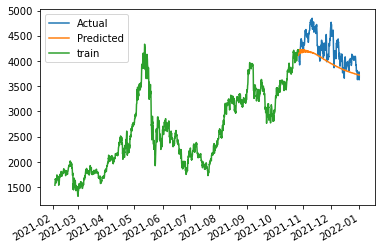

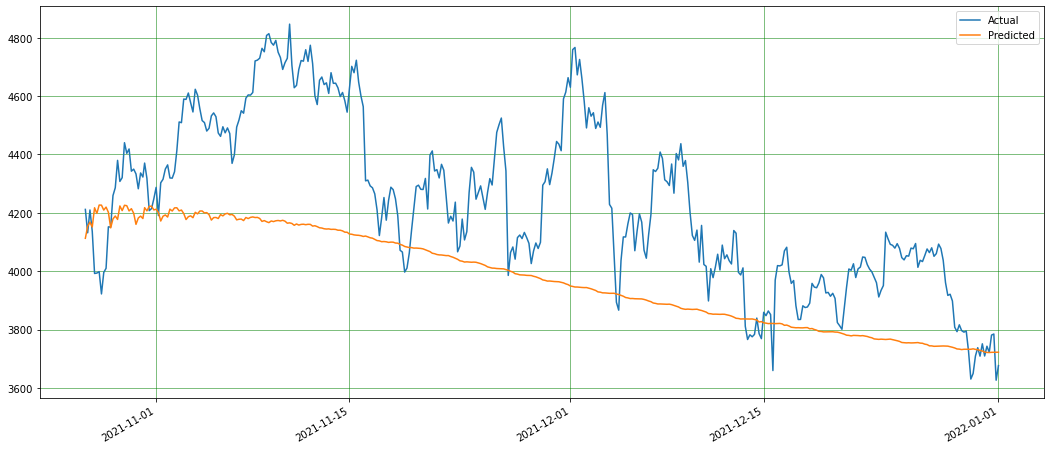

In [43]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [44]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [45]:
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 7581112.48864649
Iteration 2, loss = 5713048.66196749
Iteration 3, loss = 4145815.22737147
Iteration 4, loss = 2882885.50959198
Iteration 5, loss = 1898915.75785240
Iteration 6, loss = 1174058.12374474
Iteration 7, loss = 667352.00114512
Iteration 8, loss = 338562.92113158
Iteration 9, loss = 160157.87609473
Iteration 10, loss = 76674.92701721
Iteration 11, loss = 55093.26174006
Iteration 12, loss = 61826.83288107
Iteration 13, loss = 73769.79589938
Iteration 14, loss = 80260.99944854
Iteration 15, loss = 78869.08008642
Iteration 16, loss = 72573.48021069
Iteration 17, loss = 64785.39939170
Iteration 18, loss = 58517.04389337
Iteration 19, loss = 54968.72055097
Iteration 20, loss = 53437.32109659
Iteration 21, loss = 53153.22059695
Iteration 22, loss = 53332.66082305
Iteration 23, loss = 53452.10239380
Iteration 24, loss = 53274.50301328
Iteration 25, loss = 52930.27818937
Iteration 26, loss = 52519.60526308
Iteration 27, loss = 52205.76738699
Iteration 28, loss = 5

Iteration 48, loss = 23847.50820182
Iteration 49, loss = 23318.87718453
Iteration 50, loss = 23319.37132356
Iteration 51, loss = 23163.35516614
Iteration 52, loss = 22788.16709307
Iteration 53, loss = 22756.27399464
Iteration 54, loss = 22494.26050495
Iteration 55, loss = 22326.27841709
Iteration 56, loss = 22127.67361727
Iteration 57, loss = 22095.45905533
Iteration 58, loss = 22023.86771158
Iteration 59, loss = 22125.23063382
Iteration 60, loss = 21907.49359285
Iteration 61, loss = 21863.74443148
Iteration 62, loss = 21414.37575439
Iteration 63, loss = 21495.13294507
Iteration 64, loss = 21416.65010672
Iteration 65, loss = 21725.04900977
Iteration 66, loss = 21623.70089226
Iteration 67, loss = 21619.72849049
Iteration 68, loss = 21423.39824640
Iteration 69, loss = 20880.03186210
Iteration 70, loss = 20812.42438505
Iteration 71, loss = 20960.13563329
Iteration 72, loss = 20716.78592656
Iteration 73, loss = 20635.72260479
Iteration 74, loss = 20576.37188920
Iteration 75, loss = 20504.3

Iteration 168, loss = 29391.13575094
Iteration 169, loss = 29200.64376440
Iteration 170, loss = 29566.17436598
Iteration 171, loss = 29143.01585377
Iteration 172, loss = 29157.41895652
Iteration 173, loss = 29304.64075428
Iteration 174, loss = 28922.56603726
Iteration 175, loss = 28791.46968017
Iteration 176, loss = 29269.86880975
Iteration 177, loss = 28851.48390201
Iteration 178, loss = 28625.44948314
Iteration 179, loss = 29042.47889271
Iteration 180, loss = 30287.26967905
Iteration 181, loss = 30441.27500183
Iteration 182, loss = 28828.20320921
Iteration 183, loss = 28666.28132466
Iteration 184, loss = 28384.88557130
Iteration 185, loss = 28435.27219635
Iteration 186, loss = 28515.48892918
Iteration 187, loss = 28379.36409853
Iteration 188, loss = 28383.67939504
Iteration 189, loss = 28669.47835451
Iteration 190, loss = 28848.49704012
Iteration 191, loss = 28456.05254008
Iteration 192, loss = 28594.15794454
Iteration 193, loss = 28168.12445624
Iteration 194, loss = 28165.59431714
I

Iteration 56, loss = 20276.55637925
Iteration 57, loss = 20300.87085406
Iteration 58, loss = 20519.61253332
Iteration 59, loss = 20951.60130739
Iteration 60, loss = 20594.00256997
Iteration 61, loss = 20445.27104238
Iteration 62, loss = 20367.13755049
Iteration 63, loss = 20275.12681481
Iteration 64, loss = 20321.95438269
Iteration 65, loss = 20042.14369455
Iteration 66, loss = 19823.07164407
Iteration 67, loss = 19724.12455170
Iteration 68, loss = 19716.75143672
Iteration 69, loss = 19665.95955862
Iteration 70, loss = 19844.89215534
Iteration 71, loss = 19776.23518982
Iteration 72, loss = 19532.84266490
Iteration 73, loss = 19763.38161104
Iteration 74, loss = 19487.53719388
Iteration 75, loss = 20149.16739325
Iteration 76, loss = 19925.99177862
Iteration 77, loss = 19952.26129849
Iteration 78, loss = 20280.01494190
Iteration 79, loss = 20072.76702471
Iteration 80, loss = 21164.66230715
Iteration 81, loss = 20299.01702694
Iteration 82, loss = 20067.65919273
Iteration 83, loss = 19972.2

Iteration 55, loss = 30255.71884437
Iteration 56, loss = 29805.28099176
Iteration 57, loss = 29454.04296805
Iteration 58, loss = 29016.83059926
Iteration 59, loss = 28687.17785601
Iteration 60, loss = 28376.10053225
Iteration 61, loss = 27973.01779136
Iteration 62, loss = 27870.66956467
Iteration 63, loss = 27368.35133168
Iteration 64, loss = 27297.08034898
Iteration 65, loss = 26952.54148293
Iteration 66, loss = 26734.77117191
Iteration 67, loss = 26536.23955569
Iteration 68, loss = 26263.37963711
Iteration 69, loss = 26030.83829019
Iteration 70, loss = 25812.90518851
Iteration 71, loss = 25642.10736076
Iteration 72, loss = 25479.30791773
Iteration 73, loss = 25338.85883672
Iteration 74, loss = 25127.95882856
Iteration 75, loss = 25005.38097788
Iteration 76, loss = 24870.66048402
Iteration 77, loss = 24771.71464384
Iteration 78, loss = 24647.22210852
Iteration 79, loss = 24460.15120635
Iteration 80, loss = 24446.15145943
Iteration 81, loss = 24237.43693680
Iteration 82, loss = 24189.8

Iteration 281, loss = 18148.52805086
Iteration 282, loss = 18153.24975975
Iteration 283, loss = 18101.77278575
Iteration 284, loss = 18158.36538862
Iteration 285, loss = 18132.69794696
Iteration 286, loss = 18310.11008741
Iteration 287, loss = 18126.39043400
Iteration 288, loss = 18063.13735203
Iteration 289, loss = 18019.20330800
Iteration 290, loss = 18103.87561718
Iteration 291, loss = 18324.10385649
Iteration 292, loss = 18417.12476471
Iteration 293, loss = 18469.18659056
Iteration 294, loss = 18191.51639023
Iteration 295, loss = 18081.52749798
Iteration 296, loss = 18067.89847855
Iteration 297, loss = 18018.13307933
Iteration 298, loss = 17969.17417684
Iteration 299, loss = 18043.45709142
Iteration 300, loss = 18036.10539802
Iteration 301, loss = 18016.13107850
Iteration 302, loss = 18042.58401770
Iteration 303, loss = 18192.12746532
Iteration 304, loss = 18038.49700286
Iteration 305, loss = 18211.41869913
Iteration 306, loss = 18129.64092913
Iteration 307, loss = 17990.39766018
I

Iteration 145, loss = 31546.03102328
Iteration 146, loss = 31560.39003794
Iteration 147, loss = 31620.22846052
Iteration 148, loss = 31448.50614496
Iteration 149, loss = 31589.31158945
Iteration 150, loss = 31753.56819100
Iteration 151, loss = 31362.08420941
Iteration 152, loss = 31579.21106449
Iteration 153, loss = 31351.58537848
Iteration 154, loss = 31316.74639437
Iteration 155, loss = 31492.93445229
Iteration 156, loss = 31419.41873061
Iteration 157, loss = 31292.72532369
Iteration 158, loss = 31282.46463085
Iteration 159, loss = 31329.27993867
Iteration 160, loss = 31181.11239414
Iteration 161, loss = 31295.35052036
Iteration 162, loss = 31283.73419734
Iteration 163, loss = 31099.54485440
Iteration 164, loss = 31140.68997343
Iteration 165, loss = 31408.28466736
Iteration 166, loss = 31089.11178263
Iteration 167, loss = 31386.86242777
Iteration 168, loss = 31190.31648384
Iteration 169, loss = 31326.51821651
Iteration 170, loss = 30884.86284091
Iteration 171, loss = 31142.73865798
I

Iteration 369, loss = 26309.74193664
Iteration 370, loss = 25805.65518846
Iteration 371, loss = 25950.08210516
Iteration 372, loss = 25953.94886602
Iteration 373, loss = 25935.47839411
Iteration 374, loss = 25815.34029081
Iteration 375, loss = 26173.73618625
Iteration 376, loss = 25682.54945239
Iteration 377, loss = 25729.37110468
Iteration 378, loss = 25730.58560329
Iteration 379, loss = 25572.82268011
Iteration 380, loss = 25557.81512056
Iteration 381, loss = 25537.09413736
Iteration 382, loss = 25772.18204834
Iteration 383, loss = 25903.32481128
Iteration 384, loss = 26013.50236132
Iteration 385, loss = 25900.76568034
Iteration 386, loss = 25570.40545185
Iteration 387, loss = 25885.01055985
Iteration 388, loss = 25837.00057817
Iteration 389, loss = 25750.54324958
Iteration 390, loss = 25340.79784284
Iteration 391, loss = 25468.08495938
Iteration 392, loss = 25493.23428294
Iteration 393, loss = 25607.43596501
Iteration 394, loss = 25462.28487531
Iteration 395, loss = 25255.81175169
I

Iteration 13, loss = 58810.75401337
Iteration 14, loss = 60116.15467435
Iteration 15, loss = 59367.26956111
Iteration 16, loss = 56297.89214522
Iteration 17, loss = 55592.63157542
Iteration 18, loss = 54749.64178702
Iteration 19, loss = 53541.85003154
Iteration 20, loss = 52800.16638746
Iteration 21, loss = 51812.43748897
Iteration 22, loss = 51075.21870951
Iteration 23, loss = 50198.60071169
Iteration 24, loss = 49381.18848606
Iteration 25, loss = 48559.24135165
Iteration 26, loss = 48029.58772960
Iteration 27, loss = 46963.87862068
Iteration 28, loss = 46364.06022877
Iteration 29, loss = 45613.72511582
Iteration 30, loss = 44823.40210825
Iteration 31, loss = 44232.21182411
Iteration 32, loss = 43453.72581863
Iteration 33, loss = 42688.44262007
Iteration 34, loss = 42130.88807313
Iteration 35, loss = 41326.06593083
Iteration 36, loss = 41031.59194926
Iteration 37, loss = 40114.14127335
Iteration 38, loss = 39592.98319552
Iteration 39, loss = 39114.32084991
Iteration 40, loss = 38621.0

Iteration 237, loss = 22548.73384827
Iteration 238, loss = 22434.04795897
Iteration 239, loss = 22268.78111647
Iteration 240, loss = 22176.81436361
Iteration 241, loss = 22133.89488241
Iteration 242, loss = 22192.17298299
Iteration 243, loss = 21903.73652770
Iteration 244, loss = 21758.81075476
Iteration 245, loss = 21833.42896397
Iteration 246, loss = 22136.88791096
Iteration 247, loss = 21903.41330902
Iteration 248, loss = 21745.51944489
Iteration 249, loss = 21808.58377939
Iteration 250, loss = 21744.52712214
Iteration 251, loss = 21195.66842703
Iteration 252, loss = 21699.57421179
Iteration 253, loss = 21070.80172428
Iteration 254, loss = 21044.85386211
Iteration 255, loss = 20898.96633742
Iteration 256, loss = 21096.04078521
Iteration 257, loss = 20757.41871559
Iteration 258, loss = 20714.57079926
Iteration 259, loss = 20574.46303506
Iteration 260, loss = 20513.45597262
Iteration 261, loss = 20889.50728375
Iteration 262, loss = 21171.70047042
Iteration 263, loss = 20175.10864485
I

Iteration 117, loss = 22664.88818836
Iteration 118, loss = 22611.96461147
Iteration 119, loss = 22505.78554002
Iteration 120, loss = 22513.58370142
Iteration 121, loss = 22419.23942344
Iteration 122, loss = 22374.06177827
Iteration 123, loss = 22291.60477797
Iteration 124, loss = 22258.10523676
Iteration 125, loss = 22219.26469590
Iteration 126, loss = 22100.05559203
Iteration 127, loss = 22142.09137596
Iteration 128, loss = 21980.62056626
Iteration 129, loss = 21949.60831043
Iteration 130, loss = 21868.04286528
Iteration 131, loss = 21900.99267444
Iteration 132, loss = 21717.30367389
Iteration 133, loss = 21793.91651546
Iteration 134, loss = 21745.50054364
Iteration 135, loss = 21628.91590759
Iteration 136, loss = 21599.54994732
Iteration 137, loss = 21557.68328858
Iteration 138, loss = 21464.12431661
Iteration 139, loss = 21409.20481629
Iteration 140, loss = 21364.35552663
Iteration 141, loss = 21329.02112943
Iteration 142, loss = 21296.24575066
Iteration 143, loss = 21243.67286213
I

Iteration 34, loss = 51120.81260708
Iteration 35, loss = 50753.47044046
Iteration 36, loss = 50320.91363653
Iteration 37, loss = 49941.35625469
Iteration 38, loss = 49359.96142448
Iteration 39, loss = 48857.69856946
Iteration 40, loss = 48463.24685368
Iteration 41, loss = 48065.52356820
Iteration 42, loss = 47662.46279190
Iteration 43, loss = 47143.78096161
Iteration 44, loss = 46716.02903757
Iteration 45, loss = 46238.62105741
Iteration 46, loss = 45769.17526600
Iteration 47, loss = 45377.36688156
Iteration 48, loss = 44857.72654418
Iteration 49, loss = 44402.19077328
Iteration 50, loss = 43945.21891818
Iteration 51, loss = 43459.19133398
Iteration 52, loss = 42981.61927593
Iteration 53, loss = 42480.33304807
Iteration 54, loss = 42058.41015648
Iteration 55, loss = 41541.63327728
Iteration 56, loss = 41208.37154657
Iteration 57, loss = 40558.33239034
Iteration 58, loss = 40117.86047017
Iteration 59, loss = 39789.50702917
Iteration 60, loss = 39270.45380965
Iteration 61, loss = 38868.0

Iteration 262, loss = 26642.77627397
Iteration 263, loss = 26639.61430434
Iteration 264, loss = 26802.69904170
Iteration 265, loss = 26430.82117295
Iteration 266, loss = 26620.76305128
Iteration 267, loss = 26455.46524553
Iteration 268, loss = 26323.57633384
Iteration 269, loss = 26307.49042930
Iteration 270, loss = 26416.10337461
Iteration 271, loss = 26550.53213588
Iteration 272, loss = 26422.39125921
Iteration 273, loss = 26464.34529606
Iteration 274, loss = 26484.20584159
Iteration 275, loss = 26505.04301177
Iteration 276, loss = 26254.09378551
Iteration 277, loss = 26015.47313513
Iteration 278, loss = 26151.51838048
Iteration 279, loss = 25883.88850998
Iteration 280, loss = 25823.08889083
Iteration 281, loss = 26163.03433195
Iteration 282, loss = 26206.60928934
Iteration 283, loss = 25933.52360900
Iteration 284, loss = 26454.56178508
Iteration 285, loss = 25744.94657593
Iteration 286, loss = 26135.95676642
Iteration 287, loss = 25632.98330493
Iteration 288, loss = 25484.53975284
I

Iteration 485, loss = 17448.04229317
Iteration 486, loss = 17326.40244921
Iteration 487, loss = 17126.26320752
Iteration 488, loss = 16789.88937627
Iteration 489, loss = 16527.62230789
Iteration 490, loss = 16672.46470734
Iteration 491, loss = 17325.87423560
Iteration 492, loss = 16549.75433700
Iteration 493, loss = 16615.18462480
Iteration 494, loss = 16686.05201643
Iteration 495, loss = 16768.90013434
Iteration 496, loss = 16833.72097670
Iteration 497, loss = 16403.52904349
Iteration 498, loss = 16516.95401697
Iteration 499, loss = 16712.71005449
Iteration 500, loss = 16834.60341091
Iteration 1, loss = 3789696.19543877
Iteration 2, loss = 727723.37358131
Iteration 3, loss = 107495.56390140
Iteration 4, loss = 403163.05693920
Iteration 5, loss = 383239.32661898
Iteration 6, loss = 144134.50084506
Iteration 7, loss = 52885.74646772
Iteration 8, loss = 88365.62947678
Iteration 9, loss = 109693.98933504
Iteration 10, loss = 80251.75465240
Iteration 11, loss = 51843.50450263
Iteration 12,

Iteration 93, loss = 28524.83311733
Iteration 94, loss = 28321.01637944
Iteration 95, loss = 28581.84127652
Iteration 96, loss = 28551.28291249
Iteration 97, loss = 27562.88530645
Iteration 98, loss = 27446.84336785
Iteration 99, loss = 27406.05659958
Iteration 100, loss = 27497.11384959
Iteration 101, loss = 27095.40961645
Iteration 102, loss = 26991.77948046
Iteration 103, loss = 26965.55327643
Iteration 104, loss = 26982.46392881
Iteration 105, loss = 27168.71290806
Iteration 106, loss = 26692.67779756
Iteration 107, loss = 26839.95613071
Iteration 108, loss = 26722.64055121
Iteration 109, loss = 26545.63275166
Iteration 110, loss = 26660.93610025
Iteration 111, loss = 26912.91284080
Iteration 112, loss = 26335.88120304
Iteration 113, loss = 26574.74402229
Iteration 114, loss = 26290.44294810
Iteration 115, loss = 26619.45672561
Iteration 116, loss = 26092.66528474
Iteration 117, loss = 26337.24491639
Iteration 118, loss = 26214.22868345
Iteration 119, loss = 26304.84235764
Iteratio

Iteration 26, loss = 45437.53407652
Iteration 27, loss = 44849.74768399
Iteration 28, loss = 44275.26343666
Iteration 29, loss = 43778.14292600
Iteration 30, loss = 43289.89116631
Iteration 31, loss = 42773.12118194
Iteration 32, loss = 42267.16336916
Iteration 33, loss = 41778.83457366
Iteration 34, loss = 41313.30238680
Iteration 35, loss = 40835.38619089
Iteration 36, loss = 40302.75861317
Iteration 37, loss = 39905.51795199
Iteration 38, loss = 39485.58886638
Iteration 39, loss = 39039.62445257
Iteration 40, loss = 38613.32893783
Iteration 41, loss = 38163.72567177
Iteration 42, loss = 37716.45171838
Iteration 43, loss = 37265.47848725
Iteration 44, loss = 36787.18587700
Iteration 45, loss = 36334.74196647
Iteration 46, loss = 35839.72633286
Iteration 47, loss = 35336.18644788
Iteration 48, loss = 34765.69979565
Iteration 49, loss = 34224.22949162
Iteration 50, loss = 33678.13778039
Iteration 51, loss = 33125.01965119
Iteration 52, loss = 32576.30840835
Iteration 53, loss = 32043.4

Iteration 255, loss = 19359.48625604
Iteration 256, loss = 19313.91328210
Iteration 257, loss = 19395.16413990
Iteration 258, loss = 19221.00541481
Iteration 259, loss = 19189.41000305
Iteration 260, loss = 19146.08273434
Iteration 261, loss = 19044.29279828
Iteration 262, loss = 19024.64395017
Iteration 263, loss = 19003.60171734
Iteration 264, loss = 19025.25800346
Iteration 265, loss = 19001.57419422
Iteration 266, loss = 19104.31342098
Iteration 267, loss = 19113.78201314
Iteration 268, loss = 19220.12660100
Iteration 269, loss = 19161.03057888
Iteration 270, loss = 18963.52942355
Iteration 271, loss = 19034.41425348
Iteration 272, loss = 19094.92791080
Iteration 273, loss = 18912.22878656
Iteration 274, loss = 18934.50856010
Iteration 275, loss = 18918.22077301
Iteration 276, loss = 18946.15436168
Iteration 277, loss = 18948.15748004
Iteration 278, loss = 18949.53659984
Iteration 279, loss = 18976.46257400
Iteration 280, loss = 18852.79847735
Iteration 281, loss = 18853.45250715
I

Iteration 102, loss = 33168.43102511
Iteration 103, loss = 33111.65016964
Iteration 104, loss = 33140.40412643
Iteration 105, loss = 33104.43307639
Iteration 106, loss = 32926.39906392
Iteration 107, loss = 32904.64524816
Iteration 108, loss = 33086.18369549
Iteration 109, loss = 32843.91603524
Iteration 110, loss = 32886.68923967
Iteration 111, loss = 32727.49633642
Iteration 112, loss = 32604.26063536
Iteration 113, loss = 32678.98686184
Iteration 114, loss = 32675.52813733
Iteration 115, loss = 32565.08699167
Iteration 116, loss = 32474.38544735
Iteration 117, loss = 32473.01928150
Iteration 118, loss = 32432.44715852
Iteration 119, loss = 32532.51879580
Iteration 120, loss = 32286.35753104
Iteration 121, loss = 32469.11328575
Iteration 122, loss = 32309.01691279
Iteration 123, loss = 32639.95144729
Iteration 124, loss = 32811.74410187
Iteration 125, loss = 32297.14769316
Iteration 126, loss = 32720.23606075
Iteration 127, loss = 32239.87229125
Iteration 128, loss = 32137.36166817
I

Iteration 331, loss = 22748.01736244
Iteration 332, loss = 22575.50038519
Iteration 333, loss = 22902.60923797
Iteration 334, loss = 22436.75293588
Iteration 335, loss = 22503.67978470
Iteration 336, loss = 22650.44485247
Iteration 337, loss = 22293.76786696
Iteration 338, loss = 22412.44413201
Iteration 339, loss = 22441.29400055
Iteration 340, loss = 22268.91214790
Iteration 341, loss = 22228.25659949
Iteration 342, loss = 22028.96317466
Iteration 343, loss = 22175.34287748
Iteration 344, loss = 22060.70042186
Iteration 345, loss = 21866.61950853
Iteration 346, loss = 21905.10114176
Iteration 347, loss = 21934.89751006
Iteration 348, loss = 21764.66908935
Iteration 349, loss = 21740.07443322
Iteration 350, loss = 21551.89046800
Iteration 351, loss = 21509.55927589
Iteration 352, loss = 21524.28957338
Iteration 353, loss = 21414.63533447
Iteration 354, loss = 21280.53908971
Iteration 355, loss = 21314.37318967
Iteration 356, loss = 21306.63428683
Iteration 357, loss = 21532.57322824
I

Iteration 212, loss = 20299.72538859
Iteration 213, loss = 20674.88014362
Iteration 214, loss = 20332.10941692
Iteration 215, loss = 20450.59242291
Iteration 216, loss = 20326.58053386
Iteration 217, loss = 20093.50337995
Iteration 218, loss = 20241.68604544
Iteration 219, loss = 20152.48283277
Iteration 220, loss = 20171.25283197
Iteration 221, loss = 20120.84267367
Iteration 222, loss = 20230.97601743
Iteration 223, loss = 20153.59118569
Iteration 224, loss = 20163.09483790
Iteration 225, loss = 20098.35073470
Iteration 226, loss = 20059.07886653
Iteration 227, loss = 20091.10907218
Iteration 228, loss = 20040.22329584
Iteration 229, loss = 20055.62444158
Iteration 230, loss = 20014.39210902
Iteration 231, loss = 20042.99146597
Iteration 232, loss = 19992.99279202
Iteration 233, loss = 20026.76524600
Iteration 234, loss = 20050.04175044
Iteration 235, loss = 20029.50955793
Iteration 236, loss = 19991.76367131
Iteration 237, loss = 19999.22717002
Iteration 238, loss = 19958.43260032
I

Iteration 71, loss = 36594.18106642
Iteration 72, loss = 36581.11657197
Iteration 73, loss = 36430.84482813
Iteration 74, loss = 36357.96433294
Iteration 75, loss = 36301.01881038
Iteration 76, loss = 36236.98025529
Iteration 77, loss = 36125.74544153
Iteration 78, loss = 36084.15846759
Iteration 79, loss = 36020.12568184
Iteration 80, loss = 35957.75611666
Iteration 81, loss = 35860.11904447
Iteration 82, loss = 35766.83788218
Iteration 83, loss = 35708.68440393
Iteration 84, loss = 35649.93187224
Iteration 85, loss = 35567.78067870
Iteration 86, loss = 35493.12594200
Iteration 87, loss = 35419.17149389
Iteration 88, loss = 35334.57600237
Iteration 89, loss = 35264.54808184
Iteration 90, loss = 35312.81435116
Iteration 91, loss = 35141.19524280
Iteration 92, loss = 35066.03991335
Iteration 93, loss = 35014.96747822
Iteration 94, loss = 34936.87538402
Iteration 95, loss = 34899.56200488
Iteration 96, loss = 34880.07156974
Iteration 97, loss = 34771.01434760
Iteration 98, loss = 34794.0

Iteration 326, loss = 30056.14524969
Iteration 327, loss = 30156.80767984
Iteration 328, loss = 30033.95522805
Iteration 329, loss = 30006.99764282
Iteration 330, loss = 30059.34698450
Iteration 331, loss = 30017.51539491
Iteration 332, loss = 29949.03462159
Iteration 333, loss = 30043.28223894
Iteration 334, loss = 29929.02388444
Iteration 335, loss = 30023.70969540
Iteration 336, loss = 29843.52266454
Iteration 337, loss = 29923.21243291
Iteration 338, loss = 29831.81790590
Iteration 339, loss = 29794.12066757
Iteration 340, loss = 29775.19223944
Iteration 341, loss = 29834.41436619
Iteration 342, loss = 29860.50335856
Iteration 343, loss = 29750.77226097
Iteration 344, loss = 29716.47538934
Iteration 345, loss = 29790.94661354
Iteration 346, loss = 29586.64401735
Iteration 347, loss = 29660.81948981
Iteration 348, loss = 29598.53461135
Iteration 349, loss = 29568.75806445
Iteration 350, loss = 29616.46595412
Iteration 351, loss = 29665.32391584
Iteration 352, loss = 29986.13654324
I

Iteration 188, loss = 18539.69325908
Iteration 189, loss = 18857.06652124
Iteration 190, loss = 18822.16100752
Iteration 191, loss = 18908.76911450
Iteration 192, loss = 18637.56559940
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1540717.96637008
Iteration 2, loss = 262538.41152972
Iteration 3, loss = 131490.45797109
Iteration 4, loss = 280668.38345341
Iteration 5, loss = 173285.51190025
Iteration 6, loss = 66715.30579104
Iteration 7, loss = 72993.66565838
Iteration 8, loss = 95011.13570817
Iteration 9, loss = 80099.03476670
Iteration 10, loss = 59733.18493935
Iteration 11, loss = 59587.00083213
Iteration 12, loss = 62586.87083497
Iteration 13, loss = 57387.99881863
Iteration 14, loss = 54644.85070957
Iteration 15, loss = 54423.26545395
Iteration 16, loss = 53349.43706476
Iteration 17, loss = 52069.71710305
Iteration 18, loss = 51708.29462331
Iteration 19, loss = 51094.58719819
Iteration 20, loss = 50421.09040185
Iteratio

Iteration 218, loss = 27270.07414521
Iteration 219, loss = 27067.33233194
Iteration 220, loss = 27238.87591163
Iteration 221, loss = 27062.15876904
Iteration 222, loss = 26863.10284985
Iteration 223, loss = 26927.85211382
Iteration 224, loss = 26880.02632234
Iteration 225, loss = 26628.63031945
Iteration 226, loss = 26640.38329484
Iteration 227, loss = 27192.88045011
Iteration 228, loss = 27106.95199149
Iteration 229, loss = 26722.20693117
Iteration 230, loss = 26457.02569728
Iteration 231, loss = 26309.52456618
Iteration 232, loss = 26210.31280981
Iteration 233, loss = 26151.41202328
Iteration 234, loss = 26831.76720389
Iteration 235, loss = 26961.46888470
Iteration 236, loss = 26970.62449811
Iteration 237, loss = 26542.53984790
Iteration 238, loss = 27097.78653765
Iteration 239, loss = 26949.81569007
Iteration 240, loss = 26027.90864203
Iteration 241, loss = 25888.00377644
Iteration 242, loss = 25708.20547705
Iteration 243, loss = 25584.09370221
Iteration 244, loss = 25590.48066970
I

Iteration 440, loss = 17487.90236229
Iteration 441, loss = 17167.05868255
Iteration 442, loss = 16659.66906308
Iteration 443, loss = 16923.40451746
Iteration 444, loss = 16580.28197006
Iteration 445, loss = 16936.85499750
Iteration 446, loss = 16254.83153704
Iteration 447, loss = 16283.15800617
Iteration 448, loss = 16191.79346896
Iteration 449, loss = 16250.54443061
Iteration 450, loss = 16215.42796952
Iteration 451, loss = 16253.14742656
Iteration 452, loss = 16120.70432052
Iteration 453, loss = 16214.40959453
Iteration 454, loss = 16171.92794394
Iteration 455, loss = 16184.02842730
Iteration 456, loss = 16211.47812543
Iteration 457, loss = 16241.54003468
Iteration 458, loss = 16558.95868693
Iteration 459, loss = 15930.14821679
Iteration 460, loss = 15840.48570523
Iteration 461, loss = 15933.57186009
Iteration 462, loss = 15993.88276031
Iteration 463, loss = 15709.68437317
Iteration 464, loss = 15827.93374142
Iteration 465, loss = 15682.89169440
Iteration 466, loss = 16016.57270629
I

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [46]:
Model_R.best_params_

{'momentum': 0.9,
 'max_iter': 200,
 'learning_rate_init': 0.004,
 'hidden_layer_sizes': (200,)}

# Evaluation Measures on Test data

# MSE

In [47]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  271440.42969
Wall time: 20 s


# MAE

In [48]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  452.136


# RMSE

In [49]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  520.99945


# MAPE

In [50]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.10381


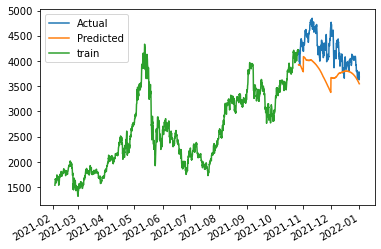

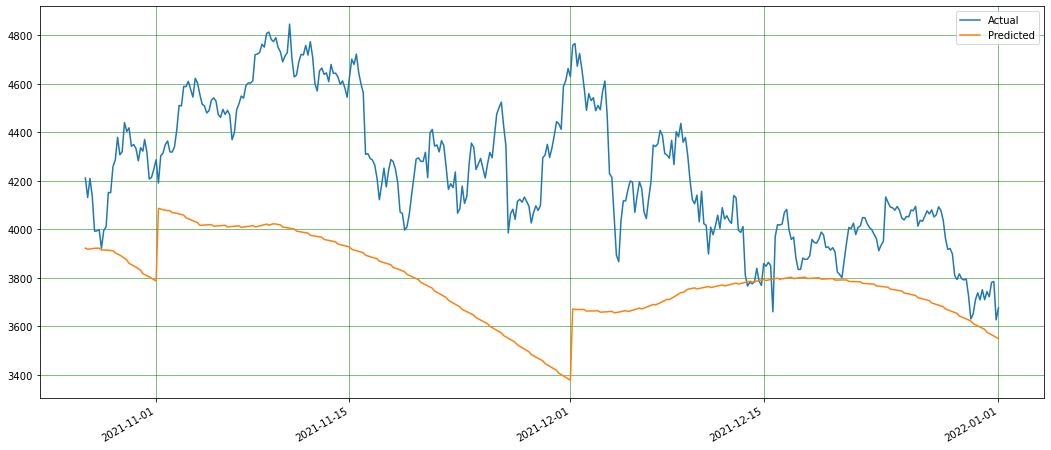

In [51]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [52]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [53]:
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [54]:
Model_R.best_params_

{'tol': 0.001, 'max_iter': 100, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [55]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  211673.06078
Wall time: 20 s


# MAE

In [56]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  416.25984


# RMSE

In [57]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  460.07941


# MAPE

In [58]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.09692


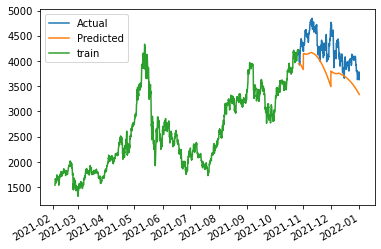

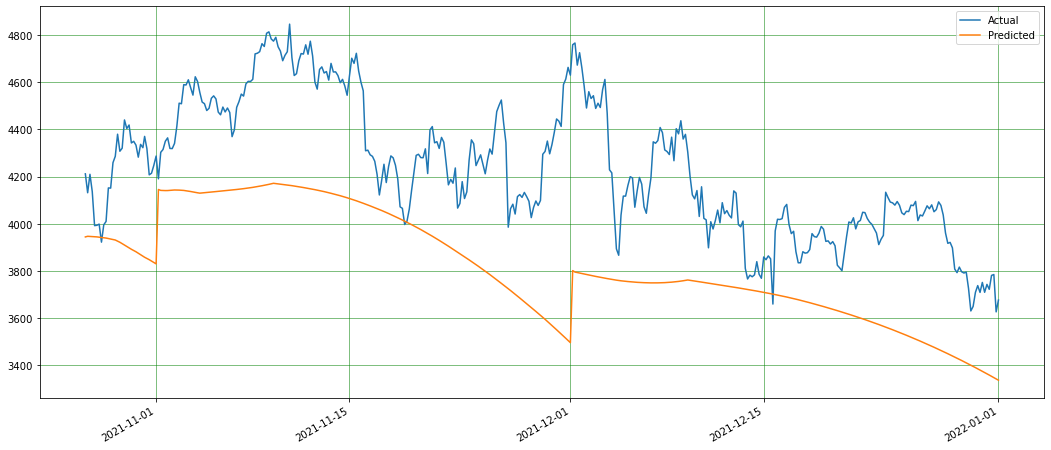

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [60]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [61]:
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [62]:
Model_R.best_params_

{'random_state': 30, 'min_samples_leaf': 50, 'max_depth': 50}

# Evaluation Measures on Test data

# MSE

In [63]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  173405.44275
Wall time: 22.4 s


# MAE

In [64]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  337.57953


# RMSE

In [65]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  416.41979


# MAPE

In [66]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.07653


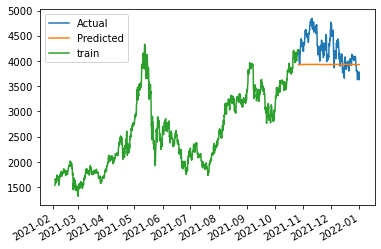

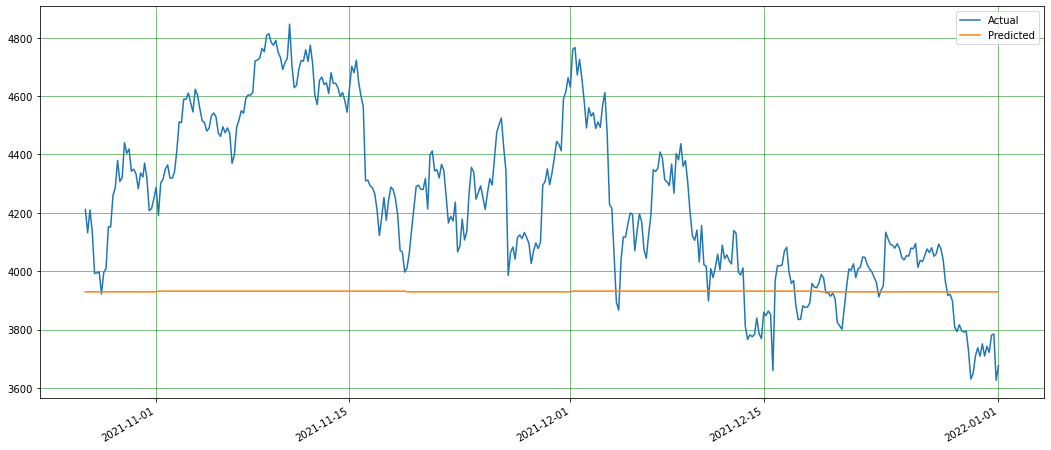

In [67]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [68]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [69]:
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [70]:
Model_R.best_params_

{'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.1, 'base_score': 0.2}

# Evaluation Measures on Test data

# MSE

In [71]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  83599.85034
Wall time: 30.2 s


# MAE

In [72]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  241.13717


# RMSE

In [73]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  289.13639


# MAPE

In [74]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.05649


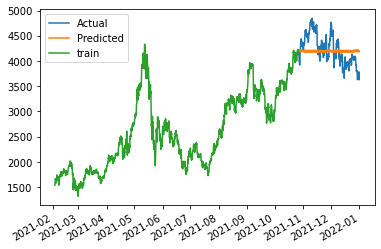

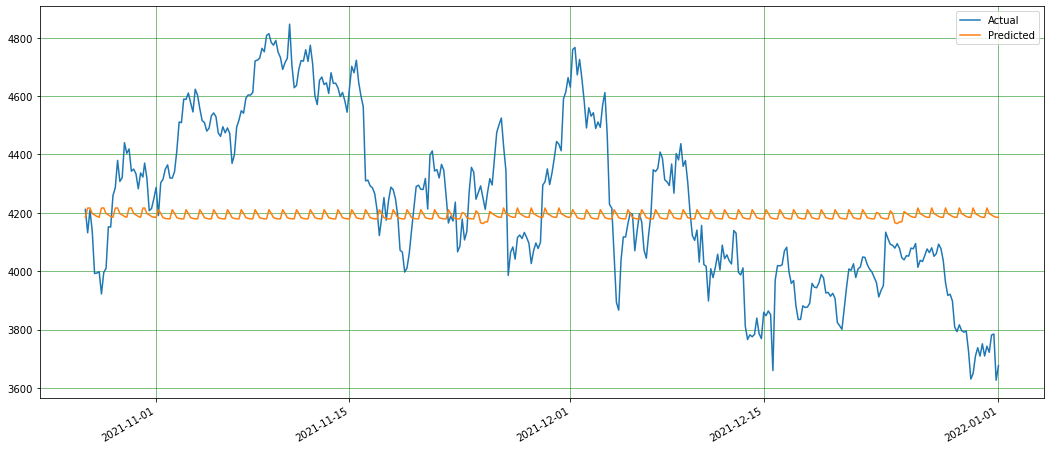

In [75]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [76]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 

print(x) # printing the table



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MSE score  |
+-------------------------+------------+
|     ARIMAX Algorithm    | 228885.932 |
|    SARIMAX Algorithm    | 106360.758 |
|      MLP Algorithm      | 271440.43  |
|     Ridge Algorithm     | 211673.061 |
| Random Forest Algorithm | 173405.443 |
|      XGB Algorithm      |  83599.85  |
+-------------------------+------------+


# Comparison of all algorithms Results on MAE score

In [77]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["ARIMAX Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 

print(x) # printing the table



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|     ARIMAX Algorithm    |  386.978  |
|    SARIMAX Algorithm    |  269.341  |
|      MLP Algorithm      |  452.136  |
|     Ridge Algorithm     |   416.26  |
| Random Forest Algorithm |   337.58  |
|      XGB Algorithm      |  241.137  |
+-------------------------+-----------+


# Comparison of all algorithms Results on RMSE score

In [78]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|     ARIMAX Algorithm    |   478.42   |
|    SARIMAX Algorithm    |   326.13   |
|      MLP Algorithm      |  520.999   |
|     Ridge Algorithm     |  460.079   |
| Random Forest Algorithm |   416.42   |
|      XGB Algorithm      |  289.136   |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [79]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|     ARIMAX Algorithm    |   0.095    |
|    SARIMAX Algorithm    |   0.062    |
|      MLP Algorithm      |   0.104    |
|     Ridge Algorithm     |   0.097    |
| Random Forest Algorithm |   0.077    |
|      XGB Algorithm      |   0.056    |
+-------------------------+------------+


